In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import ast
from scipy import stats
from scipy.optimize import curve_fit

In [45]:
#Ruta para guardar las figures para el manuscrito
results_path = "/home/andres/Dropbox/Manuscrito_Thesis/Tesis_Andrés_López/figures/results/"

### AQUI LA HISTORIA DE LOS SUBHALOS DE INTERES EN TNG50-3

Es decir el halo host de cada subhalo en cada snapshot (tng50-3)

#### Con disco

In [46]:
path = '../../results/subhalos_disk_host_history.txt'
subhalos_disk_host_history = pd.read_csv(path)

subhalos_disk_host_history['Has_Disk'] = True

subhalos_disk_host_history.head(14)

subhaloID_z0  snap  HaloFoF_host  Has_Disk
0           3433    99             3      True
1           3433    91             3      True
2           3433    81           137      True
3           3433    67           141      True
4           3433    59           289      True
5           3433    50           280      True
6           3433    44           267      True
7           3433    40           292      True
8           3433    33           423      True
9           3433    29           415      True
10          3433    25           451      True
11          3433    21           452      True
12          3434    99             3      True
13          3434    91             3      True

#### Sin disco

In [47]:
path = '../../results/subhalos_nodisk_host_history.txt'
subhalos_nodisk_host_history = pd.read_csv(path)
subhalos_nodisk_host_history['Has_Disk'] = False
subhalos_nodisk_host_history.head(14)

subhaloID_z0  snap  HaloFoF_host  Has_Disk
0             54    99             0     False
1             54    91          2337     False
2             54    81          2213     False
3             54    67          2624     False
4             54    59          2970     False
5             54    50          2749     False
6             54    44          4177     False
7             54    40          4299     False
8             54    33          6195     False
9             54    29         10259     False
10            54    25         12941     False
11            54    21         25106     False
12          3486    99             3     False
13          3486    91             3     False

### CUANDO UN SUBHALO DE TNG50-1 SE VOLVIÓ INDEPENDIENTE

In [48]:
path = "../../results/main_subhalos_independ.dat"
main_subs = pd.read_csv(path, sep='\s+', comment='#', names=['SubhaloID_z0', 'halo_TNG50-1',
                                                              'IndependenceSnap', 'FoFID_indep',
                                                              'Mass_sub' ,'Mass_fof','Has_Disk'])

In [49]:
# Mapeo de snapshot a redshift para TNG50-1 (obtenido de https://www.tng-project.org/data/downloads/TNG50-1-Dark/)
snapshot_to_redshift = np.array([
    20.05, 14.99, 11.98, 10.98, 10.00, 9.39, 9.00, 8.45, 8.01, 7.60,  # 0-9
    7.24, 7.01, 6.49, 6.01, 5.85, 5.53, 5.23, 5.00, 4.66, 4.43,      # 10-19
    4.18, 4.01, 3.71, 3.49, 3.28, 3.01, 2.90, 2.73, 2.58, 2.44,      # 20-29
    2.32, 2.21, 2.10, 2.00, 1.90, 1.82, 1.74, 1.67, 1.60, 1.53,      # 30-39
    1.50, 1.41, 1.36, 1.30, 1.25, 1.21, 1.15, 1.11, 1.07, 1.04,      # 40-49
    1.00, 0.95, 0.92, 0.89, 0.85, 0.82, 0.79, 0.76, 0.73, 0.70,      # 50-59
    0.68, 0.64, 0.62, 0.60, 0.58, 0.55, 0.52, 0.50, 0.48, 0.46,      # 60-69
    0.44, 0.42, 0.40, 0.38, 0.36, 0.35, 0.33, 0.31, 0.30, 0.27,      # 70-79
    0.26, 0.24, 0.23, 0.21, 0.20, 0.18, 0.17, 0.15, 0.14, 0.13,      # 80-89
    0.11, 0.10, 0.08, 0.07, 0.06, 0.05, 0.03, 0.02, 0.01, 0.00       # 90-99
])

# Convertir snapshots a redshifts
main_subs['Redshift'] = main_subs['IndependenceSnap'].apply(lambda snap: snapshot_to_redshift[snap] if 0 <= snap < 100 else np.nan)

# Filtrar valores válidos (excluir -1, -2, etc.)
valid_main_subs = main_subs[main_subs['IndependenceSnap'] >= 0]

### ID EN Z=0 DE SUBHALOS DE INTERES (TNG50-1)

In [50]:
# path_disk_sub = "halos.txt"
# disk_sub = pd.read_csv(path_disk_sub, sep='\s+', comment='#', names=['SubhaloID'])
# disk_sub['HasDisk'] = True

# path_nodisk_sub = "halos_nodisk.txt"
# nodisk_sub = pd.read_csv(path_nodisk_sub, sep='\s+', comment='#', names=['SubhaloID'])
# nodisk_sub['HasDisk'] = False

# #los dos juntos
# sub = pd.concat([disk_sub, nodisk_sub], ignore_index=True)

# len(disk_sub), len(nodisk_sub), len(sub)

Conservando solo esos subhalos en la lista de subhalos y su snap de independencia

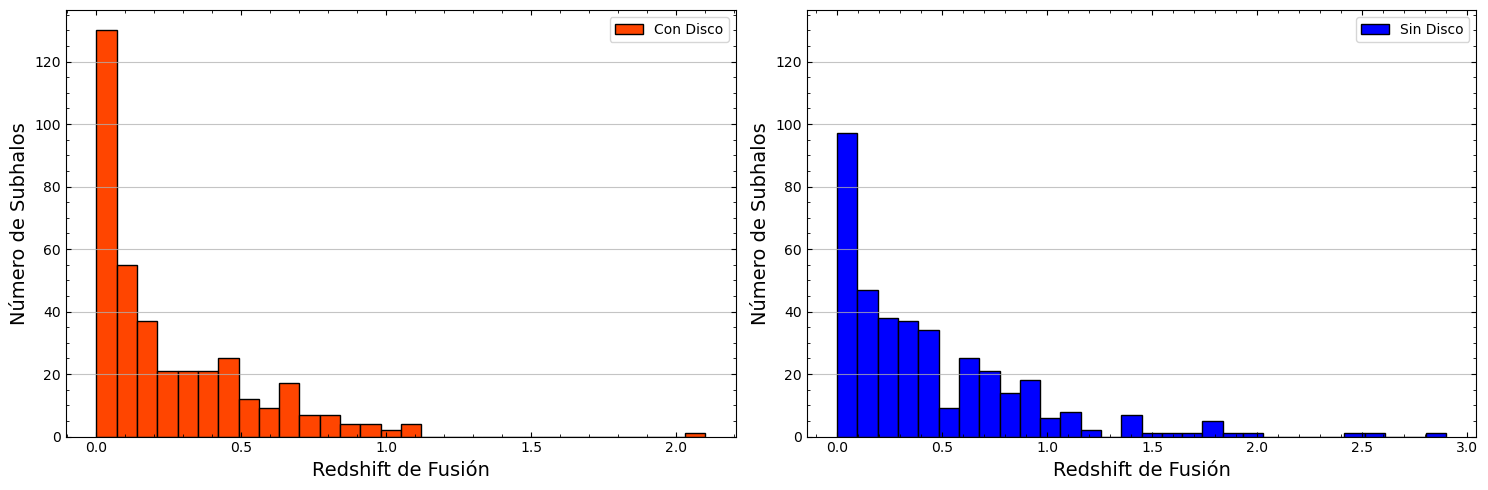

In [80]:
subs_disk = valid_main_subs[valid_main_subs['Has_Disk'] == 1]
subs_nodisk = valid_main_subs[valid_main_subs['Has_Disk'] == 0]

#grafica de redshift de independencia valid_main_subs
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(subs_disk['Redshift'], bins=30, color='orangered', edgecolor='black',label='Con Disco')
axs[0].set_xlabel('Redshift de Fusión',fontsize=14)
axs[0].set_ylabel('Número de Subhalos',fontsize=14)
#axs[0].set_title('Distribución del Redshift de Fusión de Subhalos')
axs[0].legend()
axs[0].grid(axis='y', alpha=0.75)
axs[0].minorticks_on()
axs[0].tick_params(axis='both', which='both', top=True, right=True, direction='in')

axs[1].hist(subs_nodisk['Redshift'], bins=30, color='blue', edgecolor='black',label='Sin Disco')
axs[1].set_xlabel('Redshift de Fusión',fontsize=14)
axs[1].set_ylabel('Número de Subhalos',fontsize=14)
#axs[1].set_title('Distribución del Redshift de Fusión de Subhalos')
axs[1].legend()
axs[1].grid(axis='y', alpha=0.75)
axs[1].minorticks_on()
axs[1].tick_params(axis='both', which='both', top=True, right=True, direction='in')
#que compartan un mismo eje y
ymax = max(axs[0].get_ylim()[1], axs[1].get_ylim()[1])
axs[0].set_ylim(0, ymax)
axs[1].set_ylim(0, ymax)

plt.tight_layout()
plt.savefig(results_path + 'redshift_fusion_subs_disk_nodisk_T3_Full.png', dpi=300, bbox_inches='tight')
plt.show()

### MATCH DE LOS SUBHALOS DE INTERES CON MATCH UNICO ENTRE TNG501 Y TNG503

In [52]:
PATH = "results/disk_tng501_tng503.txt"
subhalos_disk_matches = pd.read_csv(PATH, sep=' ', names=['id_tng501', 'id_tng503'])
subhalos_disk_matches.head(2)

id_tng501  id_tng503
0     117254       3433
1     117256       3434

In [81]:
len(subhalos_disk_matches)

300

In [53]:
PATH = "results/nodisk_tng501_tng503.txt"
subhalos_nodisk_matches = pd.read_csv(PATH, sep=' ', names=['id_tng501', 'id_tng503'])
subhalos_nodisk_matches.head(2)

id_tng501  id_tng503
0         57         54
1     117312       3486

In [83]:
len(subhalos_nodisk_matches)

322

AGREGAR CUANDO ESOS SUBHALOS DE INTERES SON HALOS INDEPENDIENTES

In [54]:
#si id_tng501 está en subs_disk buscar el IndependenceSnap y el FoFID_indep
merged_disk = pd.merge(subhalos_disk_matches, subs_disk, left_on='id_tng501', right_on='SubhaloID_z0', how='left')
merged_disk = merged_disk[['id_tng501', 'id_tng503', 'IndependenceSnap', 'FoFID_indep']]
merged_disk.head()

id_tng501  id_tng503  IndependenceSnap  FoFID_indep
0     117254       3433                89           71
1     117256       3434                60          124
2     117257       3436                93          234
3     117258       3432                61          150
4     117260       3438                89          375

In [55]:
#si id_tng501 está en subs_nodisk buscar el IndependenceSnap y el FoFID_indep
merged_nodisk = pd.merge(subhalos_nodisk_matches, subs_nodisk, left_on='id_tng501', right_on='SubhaloID_z0', how='left')
merged_nodisk = merged_nodisk[['id_tng501', 'id_tng503', 'IndependenceSnap', 'FoFID_indep']]
merged_nodisk.head()

id_tng501  id_tng503  IndependenceSnap  FoFID_indep
0         57         54              93.0       2198.0
1     117312       3486              84.0       3679.0
2        153        136              88.0       5120.0
3     117282       3436              89.0       1357.0
4         31          4              38.0        368.0

### MASA DOMINIO Y VIRIAL DE TODOS LOS HALOS

In [56]:
base_path="../../results/domains/"
halo3_f_z0 = pd.read_csv(base_path + 'Halos_50_3_F_z0.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z0d1 = pd.read_csv(base_path + 'Halos_50_3_F_z0d1.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z0d24 = pd.read_csv(base_path + 'Halos_50_3_F_z0d24.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z0d5 = pd.read_csv(base_path + 'Halos_50_3_F_z0d5.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z0d7 = pd.read_csv(base_path + 'Halos_50_3_F_z0d7.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z1 = pd.read_csv(base_path + 'Halos_50_3_F_z1.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z1d25 = pd.read_csv(base_path + 'Halos_50_3_F_z1d25.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z1d5 = pd.read_csv(base_path + 'Halos_50_3_F_z1d5.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z2 = pd.read_csv(base_path + 'Halos_50_3_F_z2.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z2d44 = pd.read_csv(base_path + 'Halos_50_3_F_z2d44.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z3 = pd.read_csv(base_path + 'Halos_50_3_F_z3.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z4 = pd.read_csv(base_path + 'Halos_50_3_F_z4.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])

In [57]:
# Mapeo de redshift a snapshot (basado en snapshot_to_redshift)
# z0 -> snap 99, z0.1 -> snap 91, z0.24 -> snap 81, z0.5 -> snap 67, z0.7 -> snap 59
# z1 -> snap 50, z1.25 -> snap 44, z1.5 -> snap 40, z2 -> snap 33, z2.44 -> snap 29
# z3 -> snap 25, z4 -> snap 21 

halo_datasets = [
    (halo3_f_z0, 99, 0.00),
    (halo3_f_z0d1, 91, 0.10),
    (halo3_f_z0d24, 81, 0.24),
    (halo3_f_z0d5, 67, 0.50),
    (halo3_f_z0d7, 59, 0.70),
    (halo3_f_z1, 50, 1.00),
    (halo3_f_z1d25, 44, 1.25),
    (halo3_f_z1d5, 40, 1.50),
    (halo3_f_z2, 33, 2.00),
    (halo3_f_z2d44, 29, 2.44),
    (halo3_f_z3, 25, 3.01),
    (halo3_f_z4, 21, 4.01), 
]

# Consolidar todos los halos en una sola tabla
history_full_list = []

for df, snap, z in halo_datasets:
    # El halo_id es el índice (posición en el archivo)
    df_copy = df.copy()
    df_copy['halo_id'] = df_copy.index
    df_copy['snap'] = snap
    df_copy['z'] = z
    history_full_list.append(df_copy[['halo_id', 'snap', 'z', 'Mvir', 'Rvir', 'Mdom']])

# Concatenar todos los DataFrames
history_full = pd.concat(history_full_list, ignore_index=True)

print(f"Nueva tabla history_full creada con {len(history_full)} registros")
print(f"Halos únicos: {history_full['halo_id'].nunique()}")
print(f"Snapshots únicos: {sorted(history_full['snap'].unique())}")
print("\nPrimeros registros:")
print(history_full.head(10))
print("\nÚltimos registros:")
print(history_full.tail(10))

Nueva tabla history_full creada con 2270353 registros
Halos únicos: 204635
Snapshots únicos: [np.int64(21), np.int64(25), np.int64(29), np.int64(33), np.int64(40), np.int64(44), np.int64(50), np.int64(59), np.int64(67), np.int64(81), np.int64(91), np.int64(99)]

Primeros registros:
   halo_id  snap    z          Mvir         Rvir          Mdom
0        0    99  0.0  15105.009766  1082.818237  14134.211133
1        1    99  0.0   7437.246094   855.052246   5139.087763
2        2    99  0.0   5271.313477   762.376587   3577.219161
3        3    99  0.0   3376.912842   657.213440   2818.987777
4        4    99  0.0   3218.309570   646.749878   2568.059665
5        5    99  0.0   1775.942993   530.464416   1638.491192
6        6    99  0.0   2925.985596   626.533691   1954.646174
7        7    99  0.0   2747.955811   613.571167   2543.057146
8        8    99  0.0   2261.189453   574.968689   1629.088199
9        9    99  0.0   2516.393311   595.814453   2158.948818

Últimos registros:
    

In [58]:
# Función para extraer evolución de masa normalizada (fase pre-infall)
def get_mass_evolution(merged_df, host_history_df, mass_history_df):
    """
    Se le pasa un DataFrame con las columnas 'id_tng503', 'IndependenceSnap', 'FoFID_indep'
    host_history_df: DataFrame con columnas 'subhaloID_z0', 'snap', 'HaloFoF_host'
    mass_history_df: DataFrame con columnas 'halo_id', 'snap', 'Mvir', 'Mdom'
    Devuelve una lista de DataFrames, cada uno con la evolución de masa normalizada para cada subhalo.
    Cada DataFrame tiene columnas:
    'snap', 'Mvir_norm', 'Mdom_norm', 'log_Mvir_norm', 'log_Mdom_norm', 'z', 'norm_snap'
    """
    mass_evolution = []
    
    # Filter out rows with NaN IndependenceSnap
    valid_merged = merged_df.dropna(subset=['IndependenceSnap'])
    
    for _, row in valid_merged.iterrows():
        sub_id = row['id_tng503']
        indep_snap = int(row['IndependenceSnap'])
        
        # Get host history for this subhalo
        sub_host_hist = host_history_df[host_history_df['subhaloID_z0'] == sub_id]
        
        # IndependenceSnap is when they STOP being independent (fall into a larger halo)
        # We want to see the history BEFORE that moment, when they were still independent
        # Filter for snaps < indep_snap (backwards in time from independence snap, towards higher z)
        sub_host_hist = sub_host_hist[sub_host_hist['snap'] < indep_snap]
            
        # Merge with mass history
        merged_hist = pd.merge(sub_host_hist, mass_history_df, 
                               left_on=['HaloFoF_host', 'snap'], 
                               right_on=['halo_id', 'snap'], 
                               how='inner')
        
        if not merged_hist.empty:
            merged_hist = merged_hist.sort_values('snap')
            
            # Normalize by mass at the closest available snapshot before independence
            # If IndependenceSnap doesn't have data, we use the next available snapshot
            # (the maximum snap in our filtered data snap < indep_snap)
            max_snap = merged_hist['snap'].max()
            mass_at_indep_row = merged_hist[merged_hist['snap'] == max_snap]
            
            if not mass_at_indep_row.empty:
                mvir_indep = mass_at_indep_row['Mvir'].values[0]
                mdom_indep = mass_at_indep_row['Mdom'].values[0]
                
                if mvir_indep > 0 and mdom_indep > 0:
                    merged_hist['Mvir_norm'] = merged_hist['Mvir'] / mvir_indep
                    merged_hist['Mdom_norm'] = merged_hist['Mdom'] / mdom_indep
                    # Calculate log10 of normalized masses
                    merged_hist['log_Mvir_norm'] = np.log10(merged_hist['Mvir_norm'])
                    merged_hist['log_Mdom_norm'] = np.log10(merged_hist['Mdom_norm'])
                    # Store the normalization reference snap for verification
                    merged_hist['norm_snap'] = max_snap
                    mass_evolution.append(merged_hist[['snap', 'Mvir_norm', 'Mdom_norm', 'log_Mvir_norm', 'log_Mdom_norm', 'z', 'norm_snap']])
    return mass_evolution

In [59]:
# Re-procesar con la nueva tabla completa
print("Processing Disk Subhalos (Normalized) con history_full...")
disk_mass_evol_norm = get_mass_evolution(merged_disk, subhalos_disk_host_history, history_full)
print(f"Processed {len(disk_mass_evol_norm)} disk subhalos.")

print("\nProcessing No-Disk Subhalos (Normalized) con history_full...")
nodisk_mass_evol_norm = get_mass_evolution(merged_nodisk, subhalos_nodisk_host_history, history_full)
print(f"Processed {len(nodisk_mass_evol_norm)} no-disk subhalos.")

Processing Disk Subhalos (Normalized) con history_full...
Processed 300 disk subhalos.

Processing No-Disk Subhalos (Normalized) con history_full...
Processed 318 no-disk subhalos.


### Gráficas de evolución de masa pre-infall normalizadas al momento de independencia

Las siguientes gráficas muestran la evolución de la masa virial y la masa de dominio de los halos FoF huéspedes ANTES de que los subhalos cayeran en halos más grandes (fase pre-infall).

Cada curva va desde redshifts altos (pasado lejano) hasta el redshift de independencia, y está normalizada por la masa en ese momento de independencia ($z_{indep}$). Esto permite ver cómo se fue acumulando la masa de estos halos desde su formación hasta el momento justo antes de la fusión/infall.

Se distinguen dos poblaciones: subhalos con disco (naranja) y sin disco (azul).

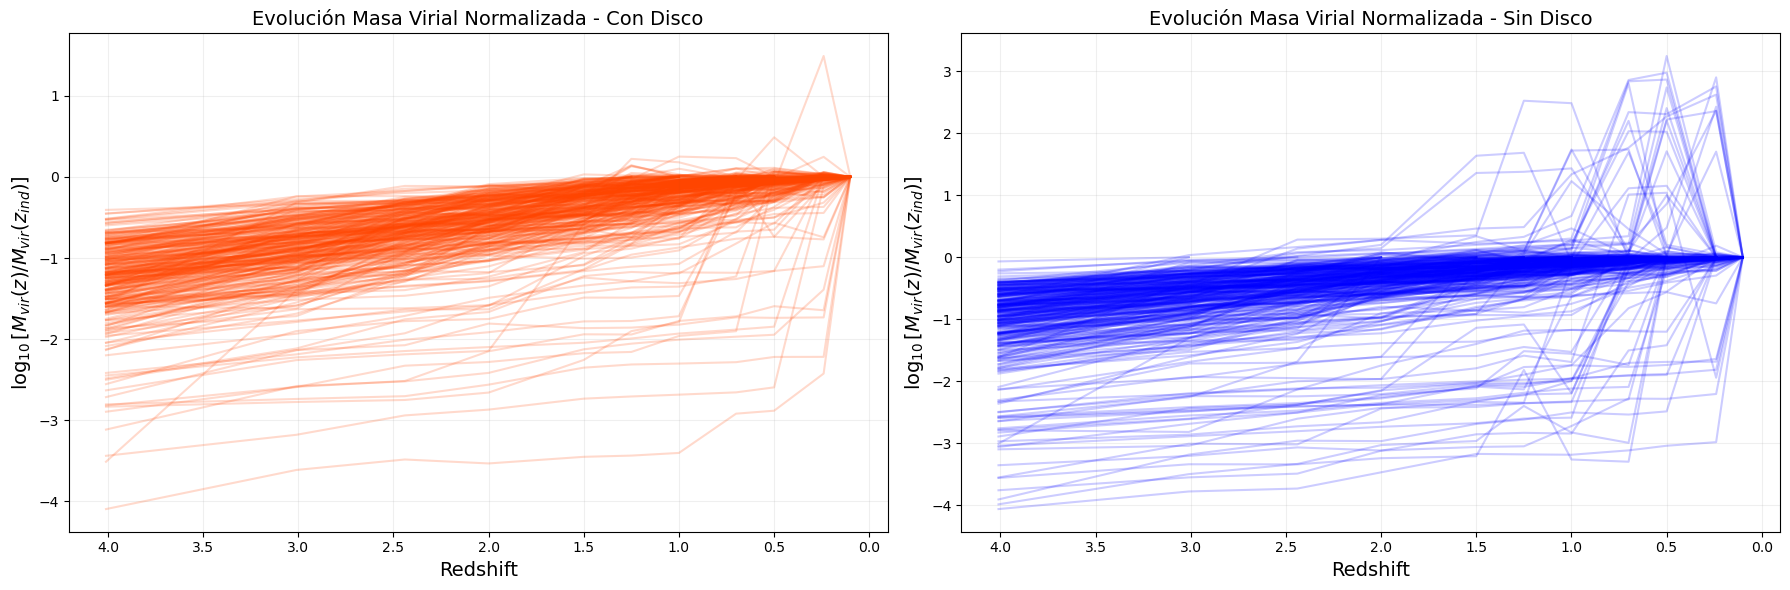

In [60]:
# Virial Mass Evolution
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

alpha_val = 0.2

# Plot disk subhalos
for df in disk_mass_evol_norm:
    axs[0].plot(df['z'], df['log_Mvir_norm'], color='orangered', alpha=alpha_val)

axs[0].set_xlabel('Redshift', fontsize = 14)
axs[0].set_ylabel('$\log_{10}[M_{vir}(z) / M_{vir}(z_{ind})]$', fontsize = 14)
axs[0].set_title('Evolución Masa Virial Normalizada - Con Disco', fontsize = 14)
axs[0].invert_xaxis()
axs[0].grid(True, which="both", ls="-", alpha=0.2)

# Plot no-disk subhalos
for df in nodisk_mass_evol_norm:
    axs[1].plot(df['z'], df['log_Mvir_norm'], color='blue', alpha=alpha_val)

axs[1].set_xlabel('Redshift', fontsize = 14)
axs[1].set_ylabel('$\log_{10}[M_{vir}(z) / M_{vir}(z_{ind})]$', fontsize = 14)
axs[1].set_title('Evolución Masa Virial Normalizada - Sin Disco', fontsize = 14)
axs[1].invert_xaxis()
axs[1].grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()

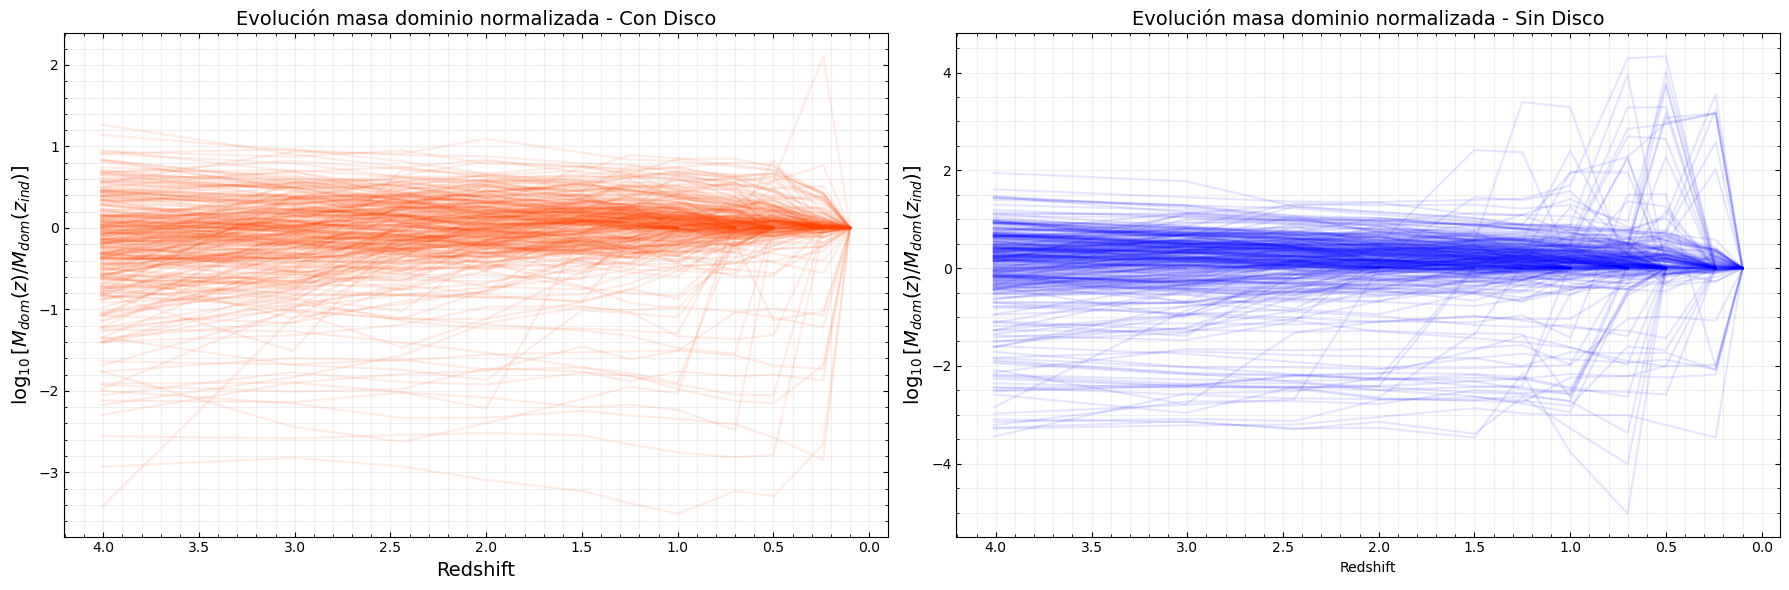

In [61]:
# Domain Mass Evolution
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

alpha_val = 0.1

# Plot disk subhalos
for df in disk_mass_evol_norm:
    axs[0].plot(df['z'], df['log_Mdom_norm'], color='orangered', alpha=alpha_val)

axs[0].set_xlabel('Redshift', fontsize = 14)
axs[0].set_ylabel('$\log_{10}[M_{dom}(z) / M_{dom}(z_{ind})]$', fontsize = 14)
axs[0].set_title('Evolución masa dominio normalizada - Con Disco', fontsize = 14)
axs[0].invert_xaxis()
axs[0].grid(True, which="both", ls="-", alpha=0.2)
axs[0].minorticks_on()
axs[0].tick_params(axis='both', which='both', top=True, right=True, direction='in')


# Plot no-disk subhalos
for df in nodisk_mass_evol_norm:
    axs[1].plot(df['z'], df['log_Mdom_norm'], color='blue', alpha=alpha_val)

axs[1].set_xlabel('Redshift')
axs[1].set_ylabel('$\log_{10}[M_{dom}(z) / M_{dom}(z_{ind})]$', fontsize=14)
axs[1].set_title('Evolución masa dominio normalizada - Sin Disco', fontsize=14)
axs[1].invert_xaxis()
axs[1].grid(True, which="both", ls="-", alpha=0.2)
axs[1].minorticks_on()
axs[1].tick_params(axis='both', which='both', top=True, right=True, direction='in')

plt.tight_layout()
plt.show()

In [62]:
# Diagnóstico de saltos extremos en masa virial
def find_extreme_jumps(mass_evol_list, threshold=0.5):
    """
    Encuentra subhalos con saltos extremos en log_Mvir_norm
    threshold: cambio mínimo en log10 (0.5 = factor de ~3x)
    """
    extreme_cases = []
    
    for i, df in enumerate(mass_evol_list):
        if len(df) > 1:
            df_sorted = df.sort_values('snap')
            log_mvir = df_sorted['log_Mvir_norm'].values
            snaps = df_sorted['snap'].values
            zs = df_sorted['z'].values
            halo_ids = df_sorted['HaloFoF_host'].values if 'HaloFoF_host' in df_sorted.columns else ['N/A'] * len(df_sorted)
            
            # Calcular diferencias entre snapshots consecutivos
            diffs = np.abs(np.diff(log_mvir))
            
            if np.any(diffs > threshold):
                max_jump_idx = np.argmax(diffs)
                extreme_cases.append({
                    'subhalo_idx': i,
                    'snap_before': snaps[max_jump_idx],
                    'snap_after': snaps[max_jump_idx + 1],
                    'z_before': zs[max_jump_idx],
                    'z_after': zs[max_jump_idx + 1],
                    'log_mvir_before': log_mvir[max_jump_idx],
                    'log_mvir_after': log_mvir[max_jump_idx + 1],
                    'jump_magnitude': diffs[max_jump_idx],
                    'factor': 10**diffs[max_jump_idx],
                    'full_data': df_sorted
                })
    
    return extreme_cases

# Buscar casos extremos
print("Analizando saltos extremos en subhalos con disco...")
disk_jumps = find_extreme_jumps(disk_mass_evol_norm, threshold=0.5)
print(f"Encontrados {len(disk_jumps)} casos con saltos > factor 3x")

print("\nAnalizando saltos extremos en subhalos sin disco...")
nodisk_jumps = find_extreme_jumps(nodisk_mass_evol_norm, threshold=0.5)
print(f"Encontrados {len(nodisk_jumps)} casos con saltos > factor 3x")

# Mostrar algunos ejemplos
if len(disk_jumps) > 0:
    print("\n=== EJEMPLO 1: Subhalo con disco ===")
    example = disk_jumps[0]
    print(f"Salto entre z={example['z_before']:.2f} (snap {example['snap_before']}) y z={example['z_after']:.2f} (snap {example['snap_after']})")
    print(f"log_Mvir_norm: {example['log_mvir_before']:.3f} → {example['log_mvir_after']:.3f}")
    print(f"Factor de cambio: {example['factor']:.1f}x")
    print("\nDatos completos de este subhalo:")
    print(example['full_data'][['snap', 'z', 'HaloFoF_host', 'Mvir', 'Mvir_norm', 'log_Mvir_norm']] if 'HaloFoF_host' in example['full_data'].columns else example['full_data'][['snap', 'z', 'Mvir_norm', 'log_Mvir_norm']])

if len(nodisk_jumps) > 0:
    print("\n=== EJEMPLO 2: Subhalo sin disco ===")
    example = nodisk_jumps[0]
    print(f"Salto entre z={example['z_before']:.2f} (snap {example['snap_before']}) y z={example['z_after']:.2f} (snap {example['snap_after']})")
    print(f"log_Mvir_norm: {example['log_mvir_before']:.3f} → {example['log_mvir_after']:.3f}")
    print(f"Factor de cambio: {example['factor']:.1f}x")
    print("\nDatos completos de este subhalo:")
    print(example['full_data'][['snap', 'z', 'HaloFoF_host', 'Mvir', 'Mvir_norm', 'log_Mvir_norm']] if 'HaloFoF_host' in example['full_data'].columns else example['full_data'][['snap', 'z', 'Mvir_norm', 'log_Mvir_norm']])

Analizando saltos extremos en subhalos con disco...
Encontrados 87 casos con saltos > factor 3x

Analizando saltos extremos en subhalos sin disco...
Encontrados 107 casos con saltos > factor 3x

=== EJEMPLO 1: Subhalo con disco ===
Salto entre z=3.01 (snap 25) y z=2.44 (snap 29)
log_Mvir_norm: -1.179 → -0.488
Factor de cambio: 4.9x

Datos completos de este subhalo:
   snap     z  Mvir_norm  log_Mvir_norm
7    21  4.01   0.022831      -1.641482
6    25  3.01   0.066209      -1.179083
5    29  2.44   0.325442      -0.487527
4    33  2.00   0.338927      -0.469894
3    40  1.50   0.822080      -0.085086
2    44  1.25   0.908382      -0.041731
1    50  1.00   0.908231      -0.041804
0    59  0.70   1.000000       0.000000

=== EJEMPLO 2: Subhalo sin disco ===
Salto entre z=1.00 (snap 50) y z=0.70 (snap 59)
log_Mvir_norm: -0.591 → -0.019
Factor de cambio: 3.7x

Datos completos de este subhalo:
   snap     z  Mvir_norm  log_Mvir_norm
9    21  4.01   0.023115      -1.636112
8    25  3.01   0.

In [63]:
# Diagnóstico de DISMINUCIONES extremas en masa virial
def find_mass_decreases(mass_evol_list, threshold=0.3):
    """
    Encuentra subhalos con DISMINUCIONES extremas en log_Mvir_norm
    threshold: cambio mínimo en log10 (0.3 = disminución de ~50%)
    """
    decrease_cases = []
    
    for i, df in enumerate(mass_evol_list):
        if len(df) > 1:
            df_sorted = df.sort_values('snap')
            log_mvir = df_sorted['log_Mvir_norm'].values
            snaps = df_sorted['snap'].values
            zs = df_sorted['z'].values
            
            # Calcular diferencias entre snapshots consecutivos
            # diff > 0 significa AUMENTO, diff < 0 significa DISMINUCIÓN
            diffs = np.diff(log_mvir)  # Sin valor absoluto para captar la dirección
            
            # Buscar disminuciones significativas (diff < -threshold)
            decreases = diffs < -threshold
            
            if np.any(decreases):
                # Encontrar la mayor disminución
                max_decrease_idx = np.argmin(diffs)
                decrease_cases.append({
                    'subhalo_idx': i,
                    'snap_before': snaps[max_decrease_idx],
                    'snap_after': snaps[max_decrease_idx + 1],
                    'z_before': zs[max_decrease_idx],
                    'z_after': zs[max_decrease_idx + 1],
                    'log_mvir_before': log_mvir[max_decrease_idx],
                    'log_mvir_after': log_mvir[max_decrease_idx + 1],
                    'decrease_magnitude': -diffs[max_decrease_idx],  # Hacerlo positivo para claridad
                    'factor': 10**(-diffs[max_decrease_idx]),  # Factor de disminución
                    'full_data': df_sorted
                })
    
    return decrease_cases

# Buscar disminuciones extremas
print("🔍 Analizando DISMINUCIONES extremas en subhalos con disco...")
disk_decreases = find_mass_decreases(disk_mass_evol_norm, threshold=0.3)
print(f"⚠️  Encontrados {len(disk_decreases)} casos con disminuciones > 50%")

print("\n🔍 Analizando DISMINUCIONES extremas en subhalos sin disco...")
nodisk_decreases = find_mass_decreases(nodisk_mass_evol_norm, threshold=0.3)
print(f"⚠️  Encontrados {len(nodisk_decreases)} casos con disminuciones > 50%")

# Mostrar algunos ejemplos
if len(disk_decreases) > 0:
    print("\n=== ⚠️  EJEMPLO 1: Subhalo con disco - DISMINUCIÓN DE MASA ===")
    example = disk_decreases[0]
    print(f"Disminución entre z={example['z_before']:.2f} (snap {example['snap_before']}) → z={example['z_after']:.2f} (snap {example['snap_after']})")
    print(f"log_Mvir_norm: {example['log_mvir_before']:.3f} → {example['log_mvir_after']:.3f}")
    print(f"Factor de DISMINUCIÓN: {example['factor']:.1f}x (la masa se redujo a 1/{example['factor']:.1f} de su valor)")
    print("\nDatos completos de este subhalo:")
    display_cols = ['snap', 'z', 'HaloFoF_host', 'Mvir', 'Mvir_norm', 'log_Mvir_norm'] if 'HaloFoF_host' in example['full_data'].columns else ['snap', 'z', 'Mvir_norm', 'log_Mvir_norm']
    print(example['full_data'][display_cols])
    
    # Mostrar más ejemplos
    if len(disk_decreases) > 1:
        print(f"\n📊 Resumen de todas las disminuciones en disco:")
        print(f"   - Total: {len(disk_decreases)}")
        print(f"   - Factor promedio de disminución: {np.mean([d['factor'] for d in disk_decreases]):.2f}x")
        print(f"   - Factor máximo de disminución: {np.max([d['factor'] for d in disk_decreases]):.2f}x")

if len(nodisk_decreases) > 0:
    print("\n=== ⚠️  EJEMPLO 2: Subhalo sin disco - DISMINUCIÓN DE MASA ===")
    example = nodisk_decreases[0]
    print(f"Disminución entre z={example['z_before']:.2f} (snap {example['snap_before']}) → z={example['z_after']:.2f} (snap {example['snap_after']})")
    print(f"log_Mvir_norm: {example['log_mvir_before']:.3f} → {example['log_mvir_after']:.3f}")
    print(f"Factor de DISMINUCIÓN: {example['factor']:.1f}x (la masa se redujo a 1/{example['factor']:.1f} de su valor)")
    print("\nDatos completos de este subhalo:")
    display_cols = ['snap', 'z', 'HaloFoF_host', 'Mvir', 'Mvir_norm', 'log_Mvir_norm'] if 'HaloFoF_host' in example['full_data'].columns else ['snap', 'z', 'Mvir_norm', 'log_Mvir_norm']
    print(example['full_data'][display_cols])
    
    # Mostrar más ejemplos
    if len(nodisk_decreases) > 1:
        print(f"\n📊 Resumen de todas las disminuciones en sin disco:")
        print(f"   - Total: {len(nodisk_decreases)}")
        print(f"   - Factor promedio de disminución: {np.mean([d['factor'] for d in nodisk_decreases]):.2f}x")
        print(f"   - Factor máximo de disminución: {np.max([d['factor'] for d in nodisk_decreases]):.2f}x")

# Verificar si las disminuciones vienen de cambios en HaloFoF_host
print("\n🔬 Análisis: ¿Las disminuciones se deben a cambios de HaloFoF_host?")
if len(disk_decreases) > 0 and 'HaloFoF_host' in disk_decreases[0]['full_data'].columns:
    example = disk_decreases[0]
    df = example['full_data']
    halo_changes = (df['HaloFoF_host'].diff() != 0).sum()
    print(f"Ejemplo disco: {halo_changes} cambios de HaloFoF_host en {len(df)} snapshots")
    print(f"HaloFoF_host únicos: {df['HaloFoF_host'].unique()}")

🔍 Analizando DISMINUCIONES extremas en subhalos con disco...
⚠️  Encontrados 3 casos con disminuciones > 50%

🔍 Analizando DISMINUCIONES extremas en subhalos sin disco...
⚠️  Encontrados 31 casos con disminuciones > 50%

=== ⚠️  EJEMPLO 1: Subhalo con disco - DISMINUCIÓN DE MASA ===
Disminución entre z=0.24 (snap 81) → z=0.10 (snap 91)
log_Mvir_norm: 1.491 → 0.000
Factor de DISMINUCIÓN: 30.9x (la masa se redujo a 1/30.9 de su valor)

Datos completos de este subhalo:
    snap     z  Mvir_norm  log_Mvir_norm
10    21  4.01   0.049301      -1.307145
9     25  3.01   0.133677      -0.873944
8     29  2.44   0.144333      -0.840634
7     33  2.00   0.279950      -0.552920
6     40  1.50   0.527915      -0.277436
5     44  1.25   0.601781      -0.220562
4     50  1.00   0.684124      -0.164865
3     59  0.70   0.783374      -0.106031
2     67  0.50   0.810029      -0.091500
1     81  0.24  30.940115       1.490522
0     91  0.10   1.000000       0.000000

📊 Resumen de todas las disminuciones

In [64]:
# VERSIÓN ALTERNATIVA: Normalizar por el snapshot MÁS TEMPRANO (z más alto, snap mínimo)
def get_mass_evolution_early_norm(merged_df, host_history_df, mass_history_df):
    mass_evolution = []
    
    # Filter out rows with NaN IndependenceSnap
    valid_merged = merged_df.dropna(subset=['IndependenceSnap'])
    
    for _, row in valid_merged.iterrows():
        sub_id = row['id_tng503']
        indep_snap = int(row['IndependenceSnap'])
        
        # Get host history for this subhalo
        sub_host_hist = host_history_df[host_history_df['subhaloID_z0'] == sub_id]
        
        # Filter for snaps < indep_snap (backwards in time from independence snap, towards higher z)
        sub_host_hist = sub_host_hist[sub_host_hist['snap'] < indep_snap]
            
        # Merge with mass history
        merged_hist = pd.merge(sub_host_hist, mass_history_df, 
                               left_on=['HaloFoF_host', 'snap'], 
                               right_on=['halo_id', 'snap'], 
                               how='inner')
        
        if not merged_hist.empty:
            merged_hist = merged_hist.sort_values('snap')
            
            # CAMBIO CLAVE: Normalizar por el PRIMER snapshot disponible (snap mínimo = z más alto)
            # Esto muestra el factor de crecimiento desde la formación temprana
            min_snap = merged_hist['snap'].min()
            mass_at_early_row = merged_hist[merged_hist['snap'] == min_snap]
            
            if not mass_at_early_row.empty:
                mvir_early = mass_at_early_row['Mvir'].values[0]
                mdom_early = mass_at_early_row['Mdom'].values[0]
                
                if mvir_early > 0 and mdom_early > 0:
                    merged_hist['Mvir_norm'] = merged_hist['Mvir'] / mvir_early
                    merged_hist['Mdom_norm'] = merged_hist['Mdom'] / mdom_early
                    # Calculate log10 of normalized masses
                    merged_hist['log_Mvir_norm'] = np.log10(merged_hist['Mvir_norm'])
                    merged_hist['log_Mdom_norm'] = np.log10(merged_hist['Mdom_norm'])
                    # Store the normalization reference snap for verification
                    merged_hist['norm_snap'] = min_snap
                    mass_evolution.append(merged_hist[['snap', 'Mvir_norm', 'Mdom_norm', 'log_Mvir_norm', 'log_Mdom_norm', 'z', 'norm_snap']])
    return mass_evolution

print("Processing Disk Subhalos (Normalized por z TEMPRANO)...")
disk_mass_evol_early = get_mass_evolution_early_norm(merged_disk, subhalos_disk_host_history, history_full)
print(f"Processed {len(disk_mass_evol_early)} disk subhalos.")

print("\nProcessing No-Disk Subhalos (Normalized por z TEMPRANO)...")
nodisk_mass_evol_early = get_mass_evolution_early_norm(merged_nodisk, subhalos_nodisk_host_history, history_full)
print(f"Processed {len(nodisk_mass_evol_early)} no-disk subhalos.")

Processing Disk Subhalos (Normalized por z TEMPRANO)...
Processed 300 disk subhalos.

Processing No-Disk Subhalos (Normalized por z TEMPRANO)...


/home/andres/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Processed 319 no-disk subhalos.


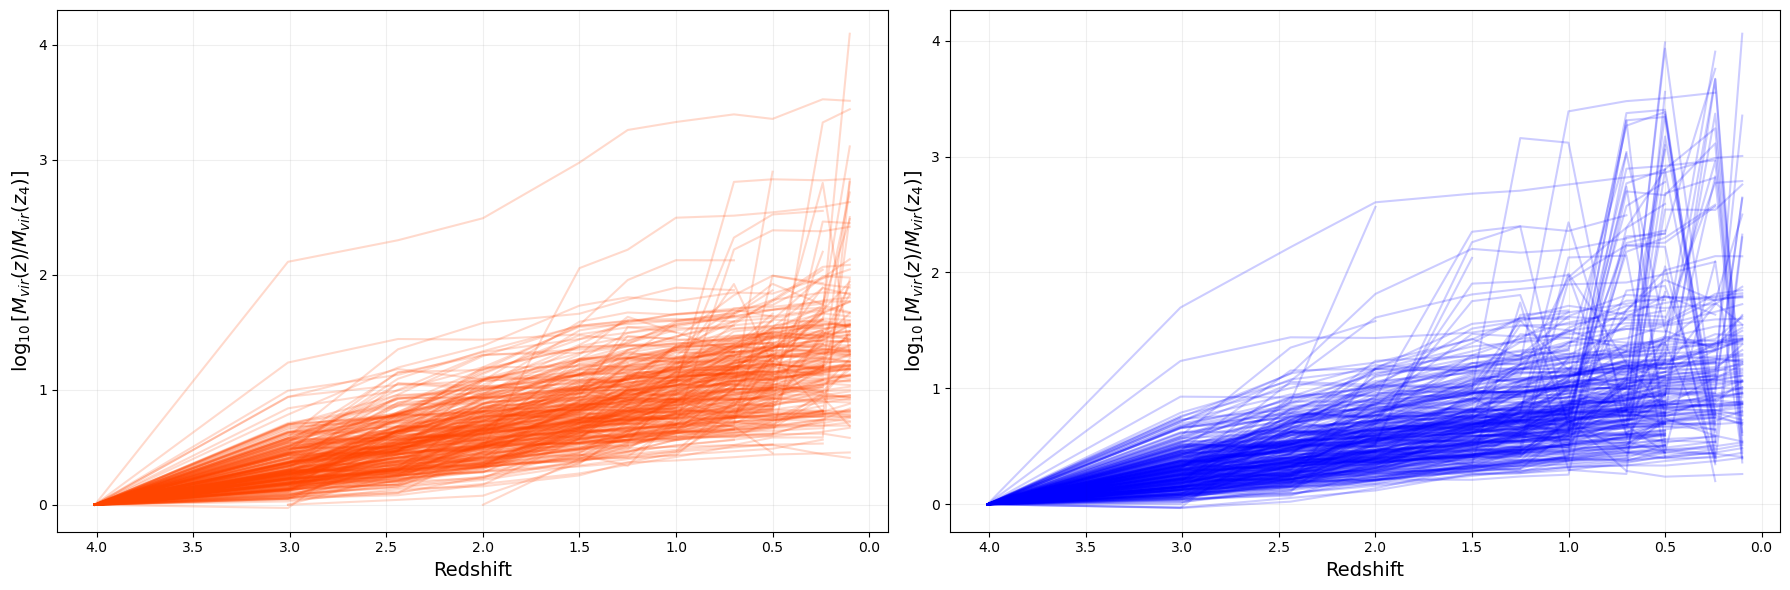

In [92]:
# Gráficas con normalización por snapshot temprano
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

alpha_val = 0.2

# Plot disk subhalos
for df in disk_mass_evol_early:
    axs[0].plot(df['z'], df['log_Mvir_norm'], color='orangered', alpha=alpha_val)

axs[0].set_xlabel('Redshift', fontsize = 14)
axs[0].set_ylabel('$\log_{10}[M_{vir}(z) / M_{vir}(z_{4})]$', fontsize = 14)
#axs[0].set_title('Evolución Masa Virial (Norm. por z temprano) - Con Disco', fontsize = 14)
axs[0].invert_xaxis()
axs[0].grid(True, which="both", ls="-", alpha=0.2)

# Plot no-disk subhalos
for df in nodisk_mass_evol_early:
    axs[1].plot(df['z'], df['log_Mvir_norm'], color='blue', alpha=alpha_val)

axs[1].set_xlabel('Redshift', fontsize = 14)
axs[1].set_ylabel('$\log_{10}[M_{vir}(z) / M_{vir}(z_{4})]$', fontsize = 14)
#axs[1].set_title('Evolución Masa Virial (Norm. por z temprano) - Sin Disco', fontsize = 14)
axs[1].invert_xaxis()
axs[1].grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.savefig(results_path + "mass_evolution_early_norm_noclean.png", dpi=300)
plt.show()

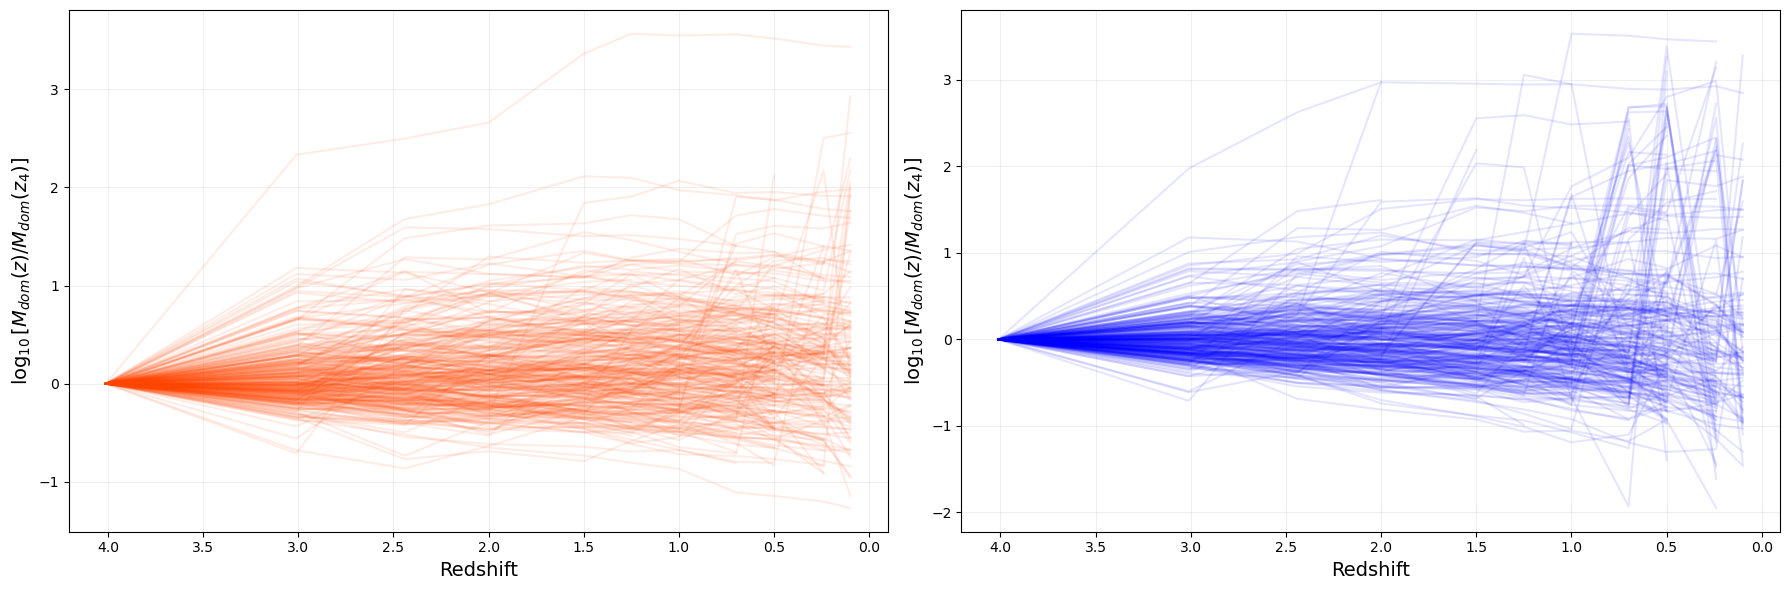

In [95]:
# Gráficas Mdom con normalización por snapshot temprano
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

alpha_val = 0.1

# Plot disk subhalos
for df in disk_mass_evol_early:
    axs[0].plot(df['z'], df['log_Mdom_norm'], color='orangered', alpha=alpha_val)

axs[0].set_xlabel('Redshift', fontsize = 14)
axs[0].set_ylabel('$\log_{10}[M_{dom}(z) / M_{dom}(z_{4})]$', fontsize = 14)
#axs[0].set_title('Evolución Masa Dominio (Norm. por z temprano) - Con Disco', fontsize = 14)
axs[0].invert_xaxis()
axs[0].grid(True, which="both", ls="-", alpha=0.2)

# Plot no-disk subhalos
for df in nodisk_mass_evol_early:
    axs[1].plot(df['z'], df['log_Mdom_norm'], color='blue', alpha=alpha_val)

axs[1].set_xlabel('Redshift', fontsize = 14)
axs[1].set_ylabel('$\log_{10}[M_{dom}(z) / M_{dom}(z_{4})]$', fontsize = 14)
#axs[1].set_title('Evolución Masa Dominio (Norm. por z temprano) - Sin Disco', fontsize = 14)
axs[1].invert_xaxis()
axs[1].grid(True, which="both", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig(results_path + "massdom_evolution_early_norm_noclean.png", dpi=300)
plt.show()

### 🔍 HIPÓTESIS: Problema con el seguimiento de halos (halo_id)

**Explicaciones posibles para las disminuciones extremas de masa:**

#### Explicaciones Físicas (poco probables para cambios tan grandes):
1. **Stripping tidal extremo**: Pérdida de material al pasar cerca de estructuras masivas
   - ❌ Problema: Debería ser gradual, no saltos de 730x en un snapshot
2. **Pérdida catastrófica por feedback**: AGN o supernovas expulsando gas
   - ❌ Problema: Afecta principalmente gas, no la masa virial total del halo DM
3. **Fusión "inversa"**: Halo se desintegra o pierde su identidad
   - ❌ Problema: No es un proceso físico común para halos independientes

#### Explicaciones Numéricas/Técnicas (MÁS PROBABLES):
1. **🎯 PROBLEMA CON halo_id**: Los archivos `Halos_50_3_F_z*.dat` pueden tener halos **ordenados por masa en cada snapshot**
   - El `halo_id` (posición en el archivo) NO es un identificador persistente en el tiempo
   - El halo_id=1000 en snap 50 puede ser un halo completamente diferente que halo_id=1000 en snap 67
   - Cuando `HaloFoF_host` cambia, estamos saltando entre diferentes halos físicos

2. **Pérdida temporal del halo**: El finder de halos FoF puede "perder" un halo en un snapshot y recuperarlo después
   - En regiones de alta densidad, el algoritmo puede fragmentar o fusionar halos incorrectamente

3. **Cambios en Rvir**: La definición del radio virial puede cambiar drásticamente entre snapshots
   - Esto cambiaría qué partículas se consideran parte del halo

**Verificación necesaria**: 
- ¿Los halos están ordenados por masa en los archivos .dat?
- ¿Existe un merger tree real con IDs persistentes para TNG50-3?

## Eliminando casos extremos

🧹 Aplicando filtro: Eliminar si M(z)/M(z_early) > 2.0 ...
Con Disco: 278 conservados, 22 eliminados por crecimiento > 2.0x
Sin Disco: 264 conservados, 55 eliminados por crecimiento > 2.0x


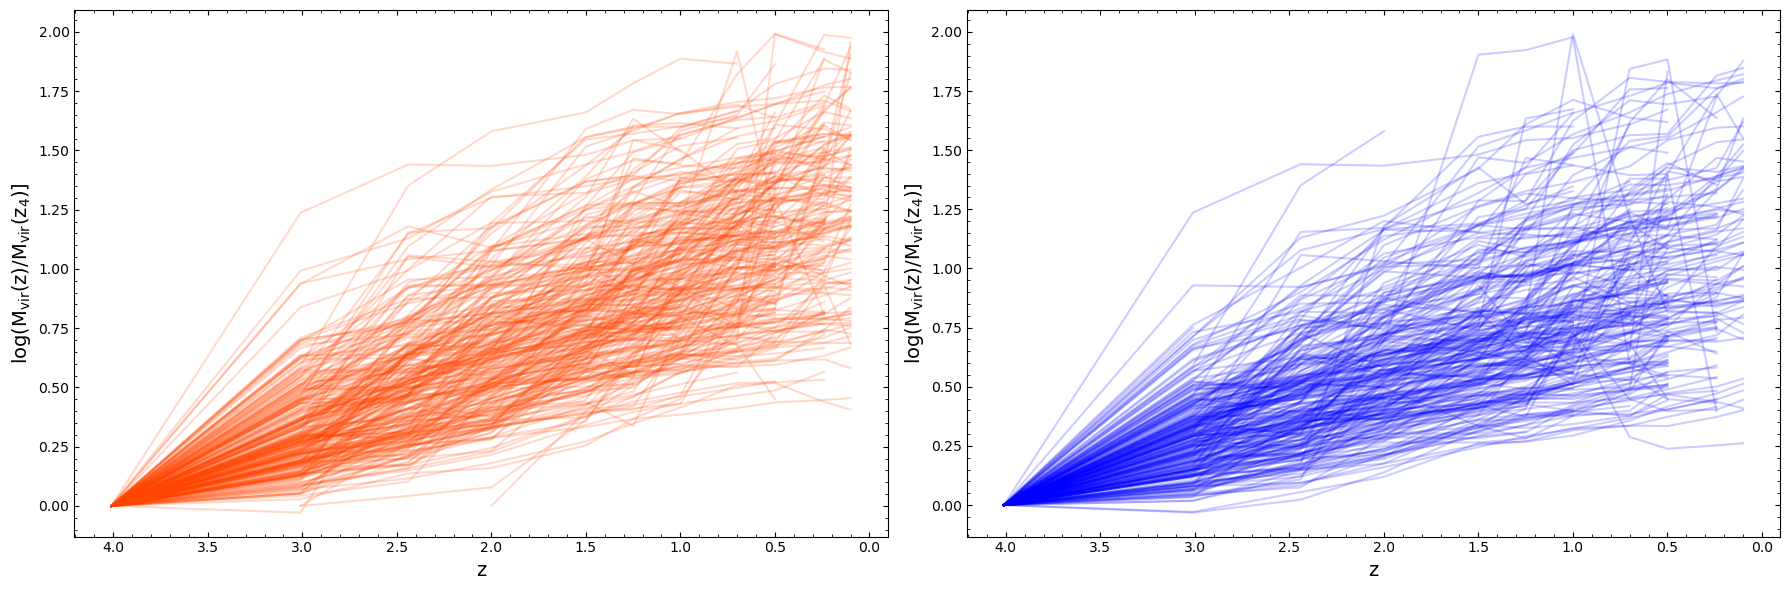

In [68]:
# Filtrar casos donde la fracción de masa exceda 2.0 en algún punto
def filter_excessive_growth(mass_evol_list, max_threshold=2.0):
    """
    Elimina subhalos cuya masa normalizada exceda el umbral en cualquier momento.
    """
    kept_list = []
    rejected_count = 0
    
    for df in mass_evol_list:
        if len(df) == 0: continue
            
        # Buscamos el valor máximo de la historia
        max_norm = df['log_Mvir_norm'].max()

        # Si en algún punto supera el umbral, descartar
        if max_norm > max_threshold:
            rejected_count += 1
        else:
            kept_list.append(df)
            
    return kept_list, rejected_count

print("🧹 Aplicando filtro: Eliminar si M(z)/M(z_early) > 2.0 ...")

# Aplicamos sobre las listas 'clean' obtenidas en el paso anterior
# Si prefieres aplicarlo sobre las originales, cambia disk_clean por disk_mass_evol_early
disk_final, disk_high_rejected = filter_excessive_growth(disk_mass_evol_early, max_threshold=2.0)
print(f"Con Disco: {len(disk_final)} conservados, {disk_high_rejected} eliminados por crecimiento > 2.0x")

nodisk_final, nodisk_high_rejected = filter_excessive_growth(nodisk_mass_evol_early, max_threshold=2.0)
print(f"Sin Disco: {len(nodisk_final)} conservados, {nodisk_high_rejected} eliminados por crecimiento > 2.0x")

# --- GRÁFICAS FINALES ---
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
alpha_val = 0.2

# Plot disk subhalos (FINAL)
for df in disk_final:
    axs[0].plot(df['z'], df['log_Mvir_norm'], color='orangered', alpha=alpha_val)

axs[0].set_xlabel('z', fontsize = 14)
axs[0].set_ylabel(r'$\log(\rm{M}_{vir}(z) / \rm{M}_{vir}(z_{4})]$', fontsize = 14)
axs[0].minorticks_on()
axs[0].tick_params(axis='both', which='both', top=True, right=True, direction='in')
#axs[0].set_title(f'Evolución Masa Virial (FINAL) - Con Disco\n(N={len(disk_final)})', fontsize = 14)
axs[0].invert_xaxis()

# Plot no-disk subhalos (FINAL)
for df in nodisk_final:
    axs[1].plot(df['z'], df['log_Mvir_norm'], color='blue', alpha=alpha_val)

axs[1].set_xlabel('z', fontsize = 14)
axs[1].set_ylabel(r'$\log(\rm{M}_{vir}(z) / \rm{M}_{vir}(z_{4})]$', fontsize = 14)
#axs[1].set_title(f'Evolución Masa Virial (FINAL) - Sin Disco\n(N={len(nodisk_final)})', fontsize = 14)
axs[1].minorticks_on()
axs[1].tick_params(axis='both', which='both', top=True, right=True, direction='in')
axs[1].invert_xaxis()

plt.tight_layout()
#guardar figura
plt.savefig(results_path + 'Mvir_Mvirz4_fit_sub_disk_nodisk_T3_Full.png', dpi=300, bbox_inches='tight')
plt.show()

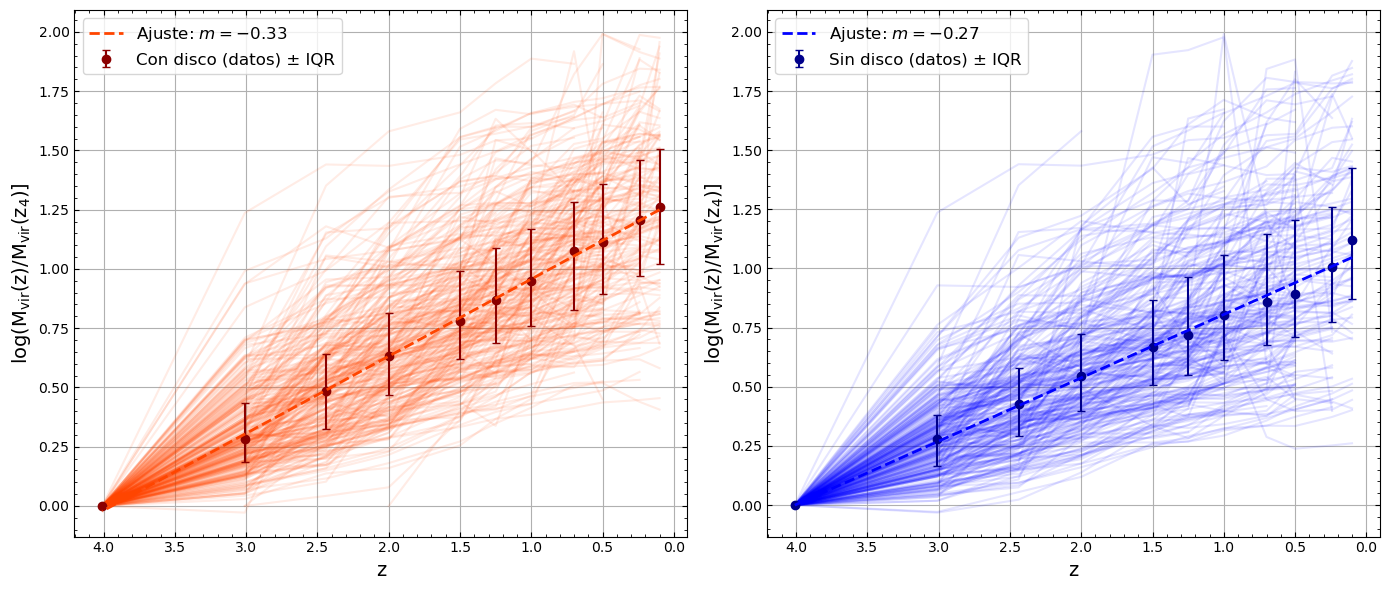

Pendiente ajuste Mediana (Con Disco): -0.3253
Pendiente ajuste Mediana (Sin Disco): -0.2677


In [85]:
def get_medians_and_fit(data_list):
    """
    Calcula la mediana de log_Mvir_norm para cada z disponible
    y realiza un ajuste lineal a esas medianas.
    Calcula el error como el rango intercuartil (Q25 y Q75).
    """
    # Recopilar todos los datos en un solo DataFrame grande
    all_data = pd.concat(data_list)
    
    # Agrupar por z y calcular mediana, Q25 y Q75
    summary = all_data.groupby('z')['log_Mvir_norm'].agg(
        median='median',
        q25=lambda x: x.quantile(0.25),
        q75=lambda x: x.quantile(0.75)
    ).reset_index()

    # Renombrar para mantener conveniencia
    summary = summary.rename(columns={'median': 'log_Mvir_norm'})

    # Ordenar por z para que la línea se dibuje bien
    medians = summary.sort_values('z')
    
    # Calcular errores asimétricos para errorbar [lower, upper]
    medians['err_low'] = medians['log_Mvir_norm'] - medians['q25']
    medians['err_high'] = medians['q75'] - medians['log_Mvir_norm']
    
    # Ajuste lineal sobre las medianas
    slope, intercept, r_value, p_value, std_err = stats.linregress(medians['z'], medians['log_Mvir_norm'])
    
    return medians, slope, intercept

# Calcular medianas y ajustes
disk_medians, disk_slope, disk_intercept = get_medians_and_fit(disk_final)
nodisk_medians, nodisk_slope, nodisk_intercept = get_medians_and_fit(nodisk_final)

# --- GRÁFICAS CON MEDIANAS Y AJUSTE ---
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
alpha_val = 0.1

# 1. DISK SUBHALOS
# Plot individual curves
for df in disk_final:
    axs[0].plot(df['z'], df['log_Mvir_norm'], color='orangered', alpha=alpha_val)

# Plot medians with asymmetric error bars (IQR)
yerr_disk = [disk_medians['err_low'], disk_medians['err_high']]
axs[0].errorbar(disk_medians['z'], disk_medians['log_Mvir_norm'], yerr=yerr_disk,
                fmt='o', color='darkred', markersize=6, label='Con disco (datos) ± IQR', zorder=5, capsize=3)

# Plot linear fit
fit_x = np.array([disk_medians['z'].min(), disk_medians['z'].max()])
fit_y = disk_slope * fit_x + disk_intercept
axs[0].plot(fit_x, fit_y, '--', color='orangered', linewidth=2, label=f'Ajuste: $m={disk_slope:.2f}$', zorder=6)

axs[0].set_xlabel('z', fontsize=14)
axs[0].set_ylabel(r'$\log(\rm{M}_{vir}(z) / \rm{M}_{vir}(z_{4})]$', fontsize=14)
#axs[0].set_title(f'Evolución Masa Virial - Con Disco (N={len(disk_final)})', fontsize=14)
axs[0].invert_xaxis()
axs[0].legend(fontsize=12)
axs[0].grid()
axs[0].minorticks_on()
axs[0].tick_params(axis='both', which='both', top=True, right=True, direction='in')

# 2. NO-DISK SUBHALOS
# Plot individual curves
for df in nodisk_final:
    axs[1].plot(df['z'], df['log_Mvir_norm'], color='blue', alpha=alpha_val)

# Plot medians with asymmetric error bars (IQR)
yerr_nodisk = [nodisk_medians['err_low'], nodisk_medians['err_high']]
axs[1].errorbar(nodisk_medians['z'], nodisk_medians['log_Mvir_norm'], yerr=yerr_nodisk,
                fmt='o', color='darkblue', markersize=6, label='Sin disco (datos) ± IQR', zorder=5, capsize=3)

# Plot linear fit
fit_x = np.array([nodisk_medians['z'].min(), nodisk_medians['z'].max()])
fit_y = nodisk_slope * fit_x + nodisk_intercept
axs[1].plot(fit_x, fit_y, '--', color='blue', linewidth=2, label=f'Ajuste: $m={nodisk_slope:.2f}$', zorder=6)

axs[1].set_xlabel('z', fontsize=14)
axs[1].set_ylabel(r'$\log(\rm{M}_{vir}(z) / \rm{M}_{vir}(z_{4})]$', fontsize=14)
#axs[1].set_title(f'Evolución Masa Virial - Sin Disco (N={len(nodisk_final)})', fontsize=14)
axs[1].invert_xaxis()
axs[1].legend(fontsize=12)
axs[1].grid()
axs[1].minorticks_on()
axs[1].tick_params(axis='both', which='both', top=True, right=True, direction='in')

plt.tight_layout()
plt.savefig(results_path + 'Mvir_Mvirz4_median_fit_sub_disk_nodisk_T3_Full.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Pendiente ajuste Mediana (Con Disco): {disk_slope:.4f}")
print(f"Pendiente ajuste Mediana (Sin Disco): {nodisk_slope:.4f}")

📊 Gráficas de Masa Dominio para la muestra filtrada por Mvir (Growth < 2.0)...


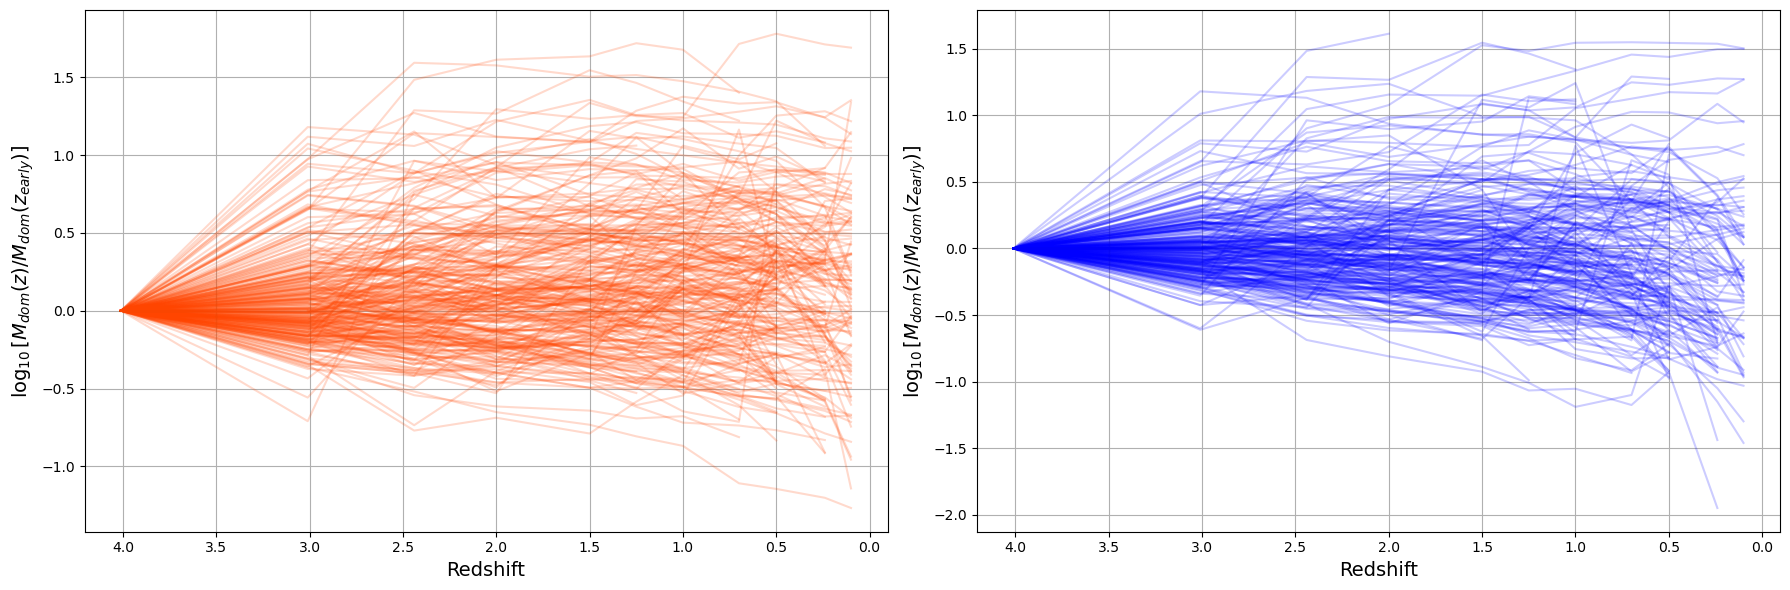

In [70]:
print("📊 Gráficas de Masa Dominio para la muestra filtrada por Mvir (Growth < 2.0)...")

# --- GRÁFICAS FINALES MDOM (Usando subhalos filtrados por Mvir) ---
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
alpha_val = 0.2
log_limit = np.log10(2.0)

# Plot disk subhalos (FINAL MDOM - Mvir filtered)
for df in disk_final:
    axs[0].plot(df['z'], df['log_Mdom_norm'], color='orangered', alpha=alpha_val)

axs[0].set_xlabel('Redshift', fontsize = 14)
axs[0].set_ylabel('$\log_{10}[M_{dom}(z) / M_{dom}(z_{early})]$', fontsize = 14)
# axs[0].set_title(f'Evolución Masa Dominio - Con Disco\n(Filtrado por Mvir < 2.0x, N={len(disk_final)})', fontsize = 14)
axs[0].grid()
axs[0].invert_xaxis()

# Plot no-disk subhalos (FINAL MDOM - Mvir filtered)
for df in nodisk_final:
    axs[1].plot(df['z'], df['log_Mdom_norm'], color='blue', alpha=alpha_val)

axs[1].set_xlabel('Redshift', fontsize = 14)
axs[1].set_ylabel('$\log_{10}[M_{dom}(z) / M_{dom}(z_{early})]$', fontsize = 14)
#axs[1].set_title(f'Evolución Masa Dominio - Sin Disco\n(Filtrado por Mvir < 2.0x, N={len(nodisk_final)})', fontsize = 14)
axs[1].grid()
axs[1].invert_xaxis()


plt.tight_layout()
plt.savefig(results_path + 'Mdom_Mdomz4_fit_sub_disk_nodisk_T3_Full.png', dpi=300, bbox_inches='tight')
plt.show()

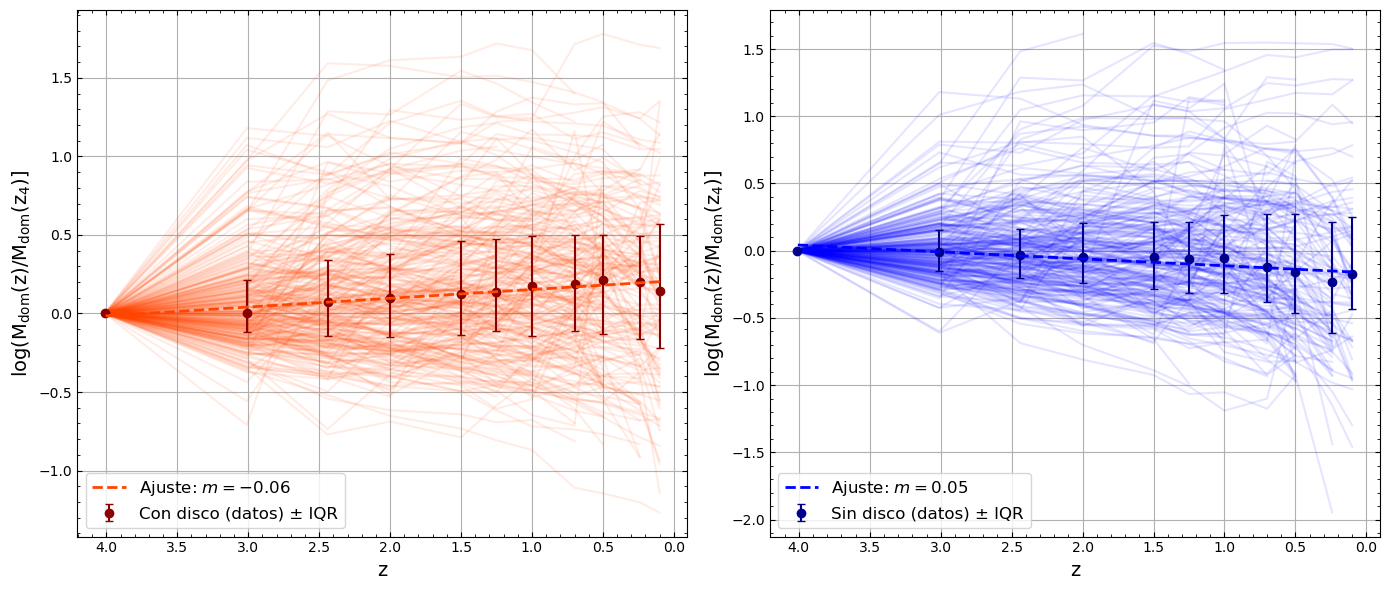

Pendiente ajuste Mediana (Con Disco): -0.0557
Pendiente ajuste Mediana (Sin Disco): 0.0514


In [91]:
def get_medians_and_fit(data_list):
    """
    Calcula la mediana de log_Mdom_norm para cada z disponible
    y realiza un ajuste lineal a esas medianas.
    Calcula el error como el rango intercuartil (Q25 y Q75).
    """
    # Recopilar todos los datos en un solo DataFrame grande
    all_data = pd.concat(data_list)
    
    # Agrupar por z y calcular mediana, Q25 y Q75
    summary = all_data.groupby('z')['log_Mdom_norm'].agg(
        median='median',
        q25=lambda x: x.quantile(0.25),
        q75=lambda x: x.quantile(0.75)
    ).reset_index()

    # Renombrar para mantener conveniencia
    summary = summary.rename(columns={'median': 'log_Mdom_norm'})

    # Ordenar por z
    medians = summary.sort_values('z')
    
    # Calcular errores asimétricos para errorbar [lower, upper]
    medians['err_low'] = medians['log_Mdom_norm'] - medians['q25']
    medians['err_high'] = medians['q75'] - medians['log_Mdom_norm']

    # Ajuste lineal sobre las medianas
    slope, intercept, r_value, p_value, std_err = stats.linregress(medians['z'], medians['log_Mdom_norm'])
    
    return medians, slope, intercept

# Calcular medianas y ajustes
disk_medians, disk_slope, disk_intercept = get_medians_and_fit(disk_final)
nodisk_medians, nodisk_slope, nodisk_intercept = get_medians_and_fit(nodisk_final)

# --- GRÁFICAS CON MEDIANAS Y AJUSTE ---
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
alpha_val = 0.1

# 1. DISK SUBHALOS
# Plot individual curves
for df in disk_final:
    axs[0].plot(df['z'], df['log_Mdom_norm'], color='orangered', alpha=alpha_val)

# Plot medians with asymmetric error bars (IQR)
yerr_disk = [disk_medians['err_low'], disk_medians['err_high']]
axs[0].errorbar(disk_medians['z'], disk_medians['log_Mdom_norm'], yerr=yerr_disk,
                fmt='o', color='darkred', markersize=6, label='Con disco (datos) ± IQR', zorder=5, capsize=3)

# Plot linear fit
fit_x = np.array([disk_medians['z'].min(), disk_medians['z'].max()])
fit_y = disk_slope * fit_x + disk_intercept
axs[0].plot(fit_x, fit_y, '--', color='orangered', linewidth=2, label=f'Ajuste: $m={disk_slope:.2f}$', zorder=6)

axs[0].set_xlabel('z', fontsize=14)
axs[0].set_ylabel(r'$\log(\rm{M}_{dom}(z) / \rm{M}_{dom}(z_{4})]$', fontsize=14)
axs[0].invert_xaxis()
axs[0].legend(fontsize=12)
axs[0].grid()
axs[0].minorticks_on()
axs[0].tick_params(axis='both', which='both', top=True, right=True, direction='in')

# 2. NO-DISK SUBHALOS
# Plot individual curves
for df in nodisk_final:
    axs[1].plot(df['z'], df['log_Mdom_norm'], color='blue', alpha=alpha_val)

# Plot medians with asymmetric error bars (IQR)
yerr_nodisk = [nodisk_medians['err_low'], nodisk_medians['err_high']]
axs[1].errorbar(nodisk_medians['z'], nodisk_medians['log_Mdom_norm'], yerr=yerr_nodisk,
                fmt='o', color='darkblue', markersize=6, label='Sin disco (datos) ± IQR', zorder=5, capsize=3)

# Plot linear fit
fit_x = np.array([nodisk_medians['z'].min(), nodisk_medians['z'].max()])
fit_y = nodisk_slope * fit_x + nodisk_intercept
axs[1].plot(fit_x, fit_y, '--', color='blue', linewidth=2, label=f'Ajuste: $m={nodisk_slope:.2f}$', zorder=6)

axs[1].set_xlabel('z', fontsize=14)
axs[1].set_ylabel(r'$\log(\rm{M}_{dom}(z) / \rm{M}_{dom}(z_{4})]$', fontsize=14)
axs[1].invert_xaxis()
axs[1].legend(fontsize=12)
axs[1].grid()
axs[1].minorticks_on()
axs[1].tick_params(axis='both', which='both', top=True, right=True, direction='in')

plt.tight_layout()
plt.savefig(results_path + 'Mdom_Mdomz4_median_fit_sub_disk_nodisk_T3_Full.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Pendiente ajuste Mediana (Con Disco): {disk_slope:.4f}")
print(f"Pendiente ajuste Mediana (Sin Disco): {nodisk_slope:.4f}")

In [72]:
def fit_growth_slopes(data_list):
    slopes = []
    r_squares = []
    
    for df in data_list:
        # Ajuste lineal: log(Mvir_norm) = a * z + b
        # x = z (Redshift)
        # y = log_Mvir_norm
        
        # Nota: Como la masa disminuye hacia el pasado (mayor z), esperamos pendientes negativas.
        # Una pendiente más negativa indica un crecimiento más rápido hacia z=0.
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(df['z'], df['log_Mvir_norm'])
        slopes.append(slope)
        r_squares.append(r_value**2)
    
    return np.array(slopes), np.array(r_squares)

print("Calculando pendientes de crecimiento (log M vs z)...")
disk_slopes, disk_r2 = fit_growth_slopes(disk_final)
nodisk_slopes, nodisk_r2 = fit_growth_slopes(nodisk_final)

print(f"--- Resultados del Ajuste Lineal ---")
print(f"N (Con Disco): {len(disk_slopes)}")
print(f"N (Sin Disco): {len(nodisk_slopes)}")

print(f"\nMedia Pendiente 'a' (Con Disco): {np.mean(disk_slopes):.4f} ± {np.std(disk_slopes):.4f}")
print(f"Media Pendiente 'a' (Sin Disco): {np.mean(nodisk_slopes):.4f} ± {np.std(nodisk_slopes):.4f}")
print(f"Media R^2 (bondad de ajuste): Disco={np.mean(disk_r2):.3f}, Sin Disco={np.mean(nodisk_r2):.3f}")

# --- Prueba de Hipótesis ---
print(f"\n--- Pruebas de Hipótesis ---")
print("H0: Las medias de las pendientes son iguales.")
print("H1: Las medias de las pendientes son diferentes.")

# Prueba T de Welch (no asume varianzas iguales)
t_stat, p_val_t = stats.ttest_ind(disk_slopes, nodisk_slopes, equal_var=False)
print(f"\nPrueba T de Welch: t = {t_stat:.4f}, p-value = {p_val_t:.4e}")

# Prueba U de Mann-Whitney (no paramétrica, no asume normalidad)
u_stat, p_val_u = stats.mannwhitneyu(disk_slopes, nodisk_slopes)
print(f"Prueba U de Mann-Whitney: p-value = {p_val_u:.4e}")

if p_val_u < 0.05:
    print("\n✅ CONCLUSIÓN: Rechazamos H0. Hay diferencias significativas en las tasas de crecimiento.")
else:
    print("\n❌ CONCLUSIÓN: No podemos rechazar H0. No hay evidencia de diferencias significativas.")

Calculando pendientes de crecimiento (log M vs z)...
--- Resultados del Ajuste Lineal ---
N (Con Disco): 278
N (Sin Disco): 264

Media Pendiente 'a' (Con Disco): -0.3255 ± 0.0929
Media Pendiente 'a' (Sin Disco): -0.2752 ± 0.1102
Media R^2 (bondad de ajuste): Disco=0.935, Sin Disco=0.914

--- Pruebas de Hipótesis ---
H0: Las medias de las pendientes son iguales.
H1: Las medias de las pendientes son diferentes.

Prueba T de Welch: t = -5.7173, p-value = 1.8351e-08
Prueba U de Mann-Whitney: p-value = 1.5431e-10

✅ CONCLUSIÓN: Rechazamos H0. Hay diferencias significativas en las tasas de crecimiento.


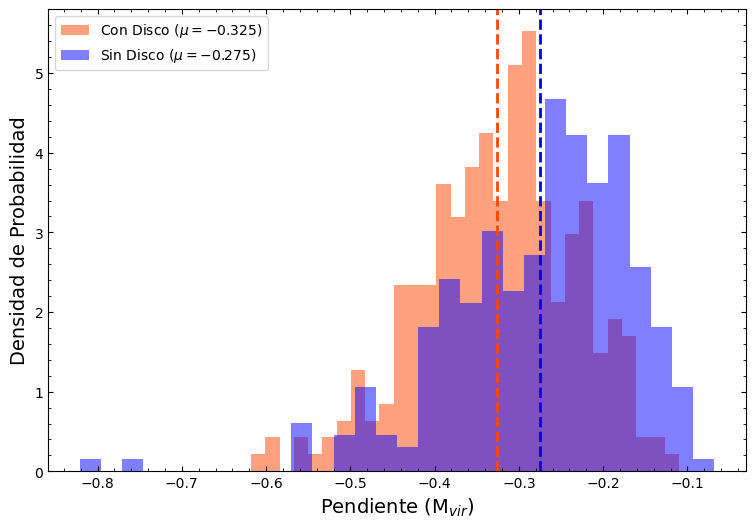

In [90]:
# Visualización de las pendientes
plt.figure(figsize=(9, 6))

# Histogramas
plt.hist(disk_slopes, bins=30, alpha=0.5, density=True, color='orangered', label=f'Con Disco ($\mu={np.mean(disk_slopes):.3f}$)')
plt.hist(nodisk_slopes, bins=30, alpha=0.5, density=True, color='blue', label=f'Sin Disco ($\mu={np.mean(nodisk_slopes):.3f}$)')

# Líneas verticales para las medias
plt.axvline(np.mean(disk_slopes), color='orangered', linestyle='--', linewidth=2)
plt.axvline(np.mean(nodisk_slopes), color='blue', linestyle='--', linewidth=2)

plt.xlabel('Pendiente (M$_{vir}$)',fontsize=14)
plt.ylabel('Densidad de Probabilidad',fontsize=14)
plt.minorticks_on()
plt.tick_params(axis='both', which='both', top=True, right=True, direction='in')
#plt.title('Distribución de Tasas de Crecimiento de Masa ($z$ vs $\log M_{vir}$)\n$y = ax + b$')
plt.legend()
plt.savefig(results_path + 'GrowthRate_Mvir_z_sub_disk_nodisk_T3_Full.png', dpi=300, bbox_inches='tight')
#plt.grid(alpha=0.3)

plt.show()

In [74]:
# --- ANÁLISIS PARA MASA DOMINIO (Mdom) ---

def fit_growth_slopes_column(data_list, col_name='log_Mdom_norm'):
    slopes = []
    r_squares = []
    
    for df in data_list:
        slope, intercept, r_value, p_value, std_err = stats.linregress(df['z'], df[col_name])
        slopes.append(slope)
        r_squares.append(r_value**2)
            
    return np.array(slopes), np.array(r_squares)

print("\n📊 Calculando pendientes de crecimiento para MASA DOMINIO (log Mdom vs z)...")
disk_slopes_dom, disk_r2_dom = fit_growth_slopes_column(disk_final, 'log_Mdom_norm')
nodisk_slopes_dom, nodisk_r2_dom = fit_growth_slopes_column(nodisk_final, 'log_Mdom_norm')

print(f"--- Resultados del Ajuste Lineal (Mdom) ---")
print(f"N (Con Disco): {len(disk_slopes_dom)}")
print(f"N (Sin Disco): {len(nodisk_slopes_dom)}")

print(f"\nMedia Pendiente 'a' (Con Disco): {np.mean(disk_slopes_dom):.4f} ± {np.std(disk_slopes_dom):.4f}")
print(f"Media Pendiente 'a' (Sin Disco): {np.mean(nodisk_slopes_dom):.4f} ± {np.std(nodisk_slopes_dom):.4f}")
print(f"Media R^2: Disco={np.mean(disk_r2_dom):.3f}, Sin Disco={np.mean(nodisk_r2_dom):.3f}")

# --- Prueba de Hipótesis (Mdom) ---
print(f"\n--- Pruebas de Hipótesis (Mdom) ---")
print("H0: Las medias de las pendientes de Mdom son iguales.")
print("H1: Las medias de las pendientes de Mdom son diferentes.")

# Prueba T de Welch
t_stat_dom, p_val_t_dom = stats.ttest_ind(disk_slopes_dom, nodisk_slopes_dom, equal_var=False)
print(f"\nPrueba T de Welch: t = {t_stat_dom:.4f}, p-value = {p_val_t_dom:.4e}")

# Prueba U de Mann-Whitney
u_stat_dom, p_val_u_dom = stats.mannwhitneyu(disk_slopes_dom, nodisk_slopes_dom)
print(f"Prueba U de Mann-Whitney: p-value = {p_val_u_dom:.4e}")

if p_val_u_dom < 0.05:
    print("\n✅ CONCLUSIÓN (Mdom): Rechazamos H0. Diferencias significativas en crecimiento de Mdom.")
else:
    print("\n❌ CONCLUSIÓN (Mdom): No podemos rechazar H0. No hay evidencia suficente.")


📊 Calculando pendientes de crecimiento para MASA DOMINIO (log Mdom vs z)...
--- Resultados del Ajuste Lineal (Mdom) ---
N (Con Disco): 278
N (Sin Disco): 264

Media Pendiente 'a' (Con Disco): -0.0471 ± 0.1360
Media Pendiente 'a' (Sin Disco): 0.0260 ± 0.1588
Media R^2: Disco=0.426, Sin Disco=0.499

--- Pruebas de Hipótesis (Mdom) ---
H0: Las medias de las pendientes de Mdom son iguales.
H1: Las medias de las pendientes de Mdom son diferentes.

Prueba T de Welch: t = -5.7324, p-value = 1.6826e-08
Prueba U de Mann-Whitney: p-value = 6.2022e-11

✅ CONCLUSIÓN (Mdom): Rechazamos H0. Diferencias significativas en crecimiento de Mdom.


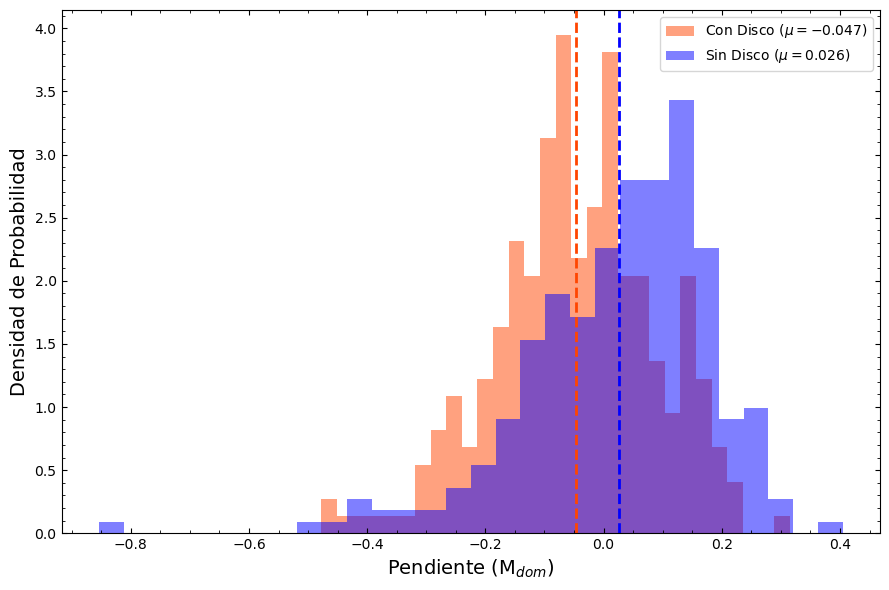

In [89]:
# Visualización de las pendientes Mdom
plt.figure(figsize=(9, 6))

# Histogramas
plt.hist(disk_slopes_dom, bins=30, alpha=0.5, density=True, color='orangered', label=f'Con Disco ($\mu={np.mean(disk_slopes_dom):.3f}$)')
plt.hist(nodisk_slopes_dom, bins=30, alpha=0.5, density=True, color='blue', label=f'Sin Disco ($\mu={np.mean(nodisk_slopes_dom):.3f}$)')

# Líneas verticales para las medias
plt.axvline(np.mean(disk_slopes_dom), color='orangered', linestyle='--', linewidth=2)
plt.axvline(np.mean(nodisk_slopes_dom), color='blue', linestyle='--', linewidth=2)

plt.xlabel(r'Pendiente (M$_{dom}$)',fontsize=14)
plt.ylabel('Densidad de Probabilidad',fontsize=14)
plt.minorticks_on()
plt.tick_params(axis='both', which='both', top=True, right=True, direction='in')
#plt.title(r'Distribución de Tasas de Crecimiento de Masa Dominio ($z$ vs $\log M_{dom}$)')
plt.legend()
plt.tight_layout()
plt.savefig(results_path + 'GrowthRate_Mdom_z_sub_disk_nodisk_T3_Full.png', dpi=300, bbox_inches='tight')
#plt.grid(alpha=0.3)

plt.show()